In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

##### Declare:
     k -> numeration of discrete spectrum
     n -> column number

In [4]:
N = 6
k = np.array([np.linspace(-2.5,2.5,N).transpose()])
n = np.array([[x for x in range(6)]])
print(k,n)

[[-2.5 -1.5 -0.5  0.5  1.5  2.5]] [[0 1 2 3 4 5]]


Create coefficient matrix

In [5]:
kn = np.multiply(k.transpose(),n)
print(kn)

[[ -0.   -2.5  -5.   -7.5 -10.  -12.5]
 [ -0.   -1.5  -3.   -4.5  -6.   -7.5]
 [ -0.   -0.5  -1.   -1.5  -2.   -2.5]
 [  0.    0.5   1.    1.5   2.    2.5]
 [  0.    1.5   3.    4.5   6.    7.5]
 [  0.    2.5   5.    7.5  10.   12.5]]


In [6]:
base = np.exp(-2*np.pi*1j/N)
print(base)

W = np.power(base,kn)
print("{}".format(np.around(W,decimals=3)))

(0.5-0.866025403784j)
[[ 1.000+0.j    -0.866+0.5j    0.500-0.866j  0.000+1.j    -0.500-0.866j
   0.866+0.5j  ]
 [ 1.000+0.j     0.000+1.j    -1.000+0.j    -0.000-1.j     1.000-0.j
   0.000+1.j   ]
 [ 1.000+0.j     0.866+0.5j    0.500+0.866j  0.000+1.j    -0.500+0.866j
  -0.866+0.5j  ]
 [ 1.000+0.j     0.866-0.5j    0.500-0.866j  0.000-1.j    -0.500-0.866j
  -0.866-0.5j  ]
 [ 1.000+0.j     0.000-1.j    -1.000-0.j    -0.000+1.j     1.000+0.j
   0.000-1.j   ]
 [ 1.000+0.j    -0.866-0.5j    0.500+0.866j  0.000-1.j    -0.500+0.866j
   0.866-0.5j  ]]


In [7]:
dt = 0.001
df = float(1/(N*dt))
fseries = df*k
print(fseries)

[[-416.66666667 -250.          -83.33333333   83.33333333  250.
   416.66666667]]


In [8]:
# s is discrete signal spectrum in time domain
# s_hat is discrete signal spectrum in frequency domain
s = np.array([[1, 0, -1, 0, 1, 0]])
s_hat = np.dot(W,s.transpose())*dt
print(np.around(s_hat,decimals=5))

[[-0.000+0.j]
 [ 0.003-0.j]
 [ 0.000+0.j]
 [ 0.000-0.j]
 [ 0.003+0.j]
 [-0.000-0.j]]


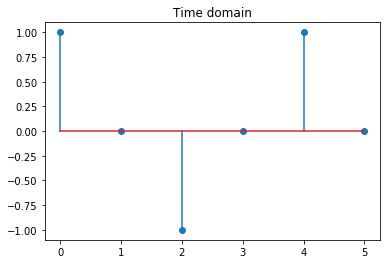

In [9]:
plt.stem(s[0])
plt.title("Time domain")

([<matplotlib.axis.YTick at 0x6a4ebb0>, <matplotlib.axis.YTick at 0x6a4e5d0>],
 <a list of 2 Text yticklabel objects>)

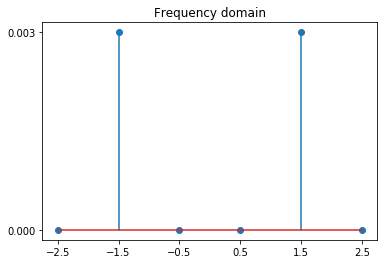

In [10]:
plt.stem(k.transpose(),np.abs(s_hat))
plt.title("Frequency domain")
plt.xticks(k.transpose())
plt.yticks([0, 3e-3])

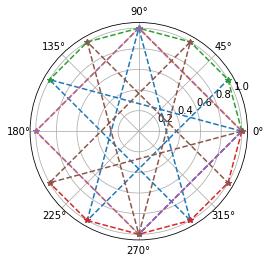

In [11]:
ax = plt.subplot(111, projection='polar')
for row in W:
    ax.plot(np.angle(row),np.abs(row),'*--')

In [12]:
Wangle = np.angle(W,deg=True)
Wr = np.abs(W)
print(np.around(Wangle,decimals=3))
print(Wr)

[[   0.  150.  -60.   90. -120.   30.]
 [   0.   90.  180.  -90.   -0.   90.]
 [   0.   30.   60.   90.  120.  150.]
 [   0.  -30.  -60.  -90. -120. -150.]
 [   0.  -90. -180.   90.    0.  -90.]
 [   0. -150.   60.  -90.  120.  -30.]]
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


Rationalize

In [41]:
s = np.array([[2, 1, 0, 1, 2, 1, 0, 1]])
N = 8
k = np.array([[x for x in range(N)]])
n = k
print(n, k)
base = np.exp(-2*np.pi*1j/N)
print(base)

kn = k.transpose()*n
print("First version: \n {}".format(kn))

[[0 1 2 3 4 5 6 7]] [[0 1 2 3 4 5 6 7]]
(0.707106781187-0.707106781187j)
First version: 
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]


In [51]:
import pprint as pp
W = base**kn
print(base**(7+6), base**7)
for row in W:
    print(np.around(row,decimals=1))

(-0.707106781187+0.707106781187j) (0.707106781187+0.707106781187j)
[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
[ 1.0+0.j   0.7-0.7j  0.0-1.j  -0.7-0.7j -1.0-0.j  -0.7+0.7j -0.0+1.j
  0.7+0.7j]
[ 1.+0.j  0.-1.j -1.-0.j -0.+1.j  1.+0.j  0.-1.j -1.-0.j -0.+1.j]
[ 1.0+0.j  -0.7-0.7j -0.0+1.j   0.7-0.7j -1.0-0.j   0.7+0.7j  0.0-1.j
 -0.7+0.7j]
[ 1.+0.j -1.-0.j  1.+0.j -1.-0.j  1.+0.j -1.-0.j  1.+0.j -1.-0.j]
[ 1.0+0.j  -0.7+0.7j  0.0-1.j   0.7+0.7j -1.0-0.j   0.7-0.7j -0.0+1.j
 -0.7-0.7j]
[ 1.+0.j -0.+1.j -1.-0.j  0.-1.j  1.+0.j -0.+1.j -1.-0.j  0.-1.j]
[ 1.0+0.j   0.7+0.7j -0.0+1.j  -0.7+0.7j -1.0-0.j  -0.7-0.7j  0.0-1.j
  0.7-0.7j]


In [27]:
s_hat = np.dot(W,s.transpose())
print(np.around(s_hat, decimals=0))

[[ 8.+0.j]
 [-0.-0.j]
 [ 4.+0.j]
 [-0.-0.j]
 [ 0.-0.j]
 [ 0.-0.j]
 [ 4.+0.j]
 [ 0.-0.j]]


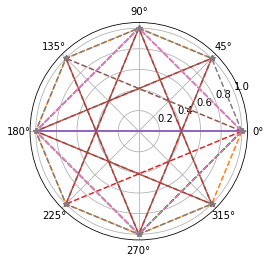

In [50]:
ax = plt.subplot(111, projection='polar')
for row in W:
    ax.plot(np.angle(row),np.abs(row),'*--')